In [102]:
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# BETH Cybersecurity Dataset

The BETH cybersecurity dataset contains pre-split data of 60% training, 20% validation, and 20% testing data. The researchers performed the split to ensure only the testing dataset contained ‘evil’ (malicious) events. The pre-split dataset configuration is designed to evaluate the anomaly detection algorithm's ability to identify never-before-seen (out-of-distribution) abnormal behavior.

In [103]:
#Load the BETH training dataset to Pandas dataframe
df_train = pd.read_csv("C:\\Users\\harri\\Desktop\\Data Science\\BETH\\labelled_training_data.csv")

In [105]:
##Load the BETH validation dataset to Pandas dataframe
df_validate = pd.read_csv("C:\\Users\\harri\\Desktop\\Data Science\\BETH\\labelled_validation_data.csv")

In [104]:
##Load the BETH testing dataset to Pandas dataframe
df_test = pd.read_csv("C:\\Users\\harri\\Desktop\\Data Science\\BETH\\labelled_testing_data.csv")

In [106]:
#Drop nonessential or redundant features from the training dataset
df_train = df_train.drop(['timestamp', 'eventName', 'stackAddresses', 'args'], axis=1)

In [108]:
#Drop nonessential or redundant features from the validate dataset
df_validate = df_validate.drop(['timestamp', 'eventName', 'stackAddresses', 'args'], axis=1)

In [107]:
#Drop nonessential or redundant features from the testing dataset
df_test = df_test.drop(['timestamp', 'eventName', 'stackAddresses', 'args'], axis=1)

In [109]:
df_validate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188967 entries, 0 to 188966
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   processId        188967 non-null  int64 
 1   threadId         188967 non-null  int64 
 2   parentProcessId  188967 non-null  int64 
 3   userId           188967 non-null  int64 
 4   mountNamespace   188967 non-null  int64 
 5   processName      188967 non-null  object
 6   hostName         188967 non-null  object
 7   eventId          188967 non-null  int64 
 8   argsNum          188967 non-null  int64 
 9   returnValue      188967 non-null  int64 
 10  sus              188967 non-null  int64 
 11  evil             188967 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 17.3+ MB


In [110]:
df_test.head(10)

,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,argsNum,returnValue,sus,evil
0,382,382,1,101,4026532232,systemd-resolve,ip-10-100-1-217,41,3,15,0,0
1,379,379,1,100,4026532231,systemd-network,ip-10-100-1-217,41,3,15,0,0
2,1,1,0,0,4026531840,systemd,ip-10-100-1-217,1005,4,0,0,0
3,1,1,0,0,4026531840,systemd,ip-10-100-1-217,257,4,17,0,0
4,1,1,0,0,4026531840,systemd,ip-10-100-1-217,5,2,0,0,0
5,1,1,0,0,4026531840,systemd,ip-10-100-1-217,3,1,0,0,0
6,1,1,0,0,4026531840,systemd,ip-10-100-1-217,1005,4,0,0,0
7,1,1,0,0,4026531840,systemd,ip-10-100-1-217,257,4,17,0,0
8,1,1,0,0,4026531840,systemd,ip-10-100-1-217,5,2,0,0,0
9,1,1,0,0,4026531840,systemd,ip-10-100-1-217,3,1,0,0,0


## Variable Encoding

Many of the BETH datset features have many levels (high cardinality). For example, the training dataset 'processName' variable has 36 levels. Interestingly, the testing dataset 'processName' variable has 244 levels. Both are shown on the next lines.

### High cardinality variables

In [111]:
df_train.value_counts('processName').size

36

In [112]:
df_test.value_counts('processName').size

244

### Hash Encoding

Hash encode non-numeric variables: high cardinality 'processName' with 'hostName' categorical variable

In [113]:
enc = ce.HashingEncoder(n_components=8, cols=['processName', 'hostName'])

In [114]:
df_train_enc = enc.fit_transform(df_train)

In [116]:
df_validate_enc = enc.fit_transform(df_validate)

In [115]:
df_test_enc = enc.fit_transform(df_test)

In [117]:
df_train_enc

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,processId,threadId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus,evil
0,0,1,0,0,0,0,0,1,381,7337,1,100,4026532231,157,5,0,1,0
1,0,1,0,0,0,0,0,1,381,7337,1,100,4026532231,3,1,0,1,0
2,0,1,0,0,0,0,0,1,381,7337,1,100,4026532231,1010,0,0,1,0
3,0,1,0,1,0,0,0,0,7347,7347,7341,0,4026531840,21,2,-2,1,0
4,0,1,0,1,0,0,0,0,7347,7347,7341,0,4026531840,1005,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763139,0,1,0,0,1,0,0,0,7274,7274,7108,0,4026531840,1003,1,0,0,0
763140,0,1,0,0,1,0,0,0,7274,7274,7108,0,4026531840,62,2,0,0,0
763141,0,1,0,0,1,0,0,0,7274,7274,7108,0,4026531840,1010,0,0,0,0
763142,0,1,0,0,1,0,0,0,7275,7275,1,109,4026531840,1010,0,0,0,0


#### Now, all variables are numeric

In [118]:
df_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763144 entries, 0 to 763143
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   col_0            763144 non-null  int64
 1   col_1            763144 non-null  int64
 2   col_2            763144 non-null  int64
 3   col_3            763144 non-null  int64
 4   col_4            763144 non-null  int64
 5   col_5            763144 non-null  int64
 6   col_6            763144 non-null  int64
 7   col_7            763144 non-null  int64
 8   processId        763144 non-null  int64
 9   threadId         763144 non-null  int64
 10  parentProcessId  763144 non-null  int64
 11  userId           763144 non-null  int64
 12  mountNamespace   763144 non-null  int64
 13  eventId          763144 non-null  int64
 14  argsNum          763144 non-null  int64
 15  returnValue      763144 non-null  int64
 16  sus              763144 non-null  int64
 17  evil             763144 non-n

## Feature Engineering

Feature engineering recommended by Highnam et al. (2021) to reduce cardinality and normalize

In [131]:
#Create new dataframes for feature engineering
df_train_eng = df_train_enc.copy()
df_test_eng = df_test_enc.copy()
df_validate_eng = df_validate_enc.copy()

### Transform 'mountNamespace' variable to binary

Transform mountNamespace to binary variable (1 = user account had access to mnt/ directory, 0 = Operating System mountspace)

In [133]:
df_train_eng["mountNamespace"] = df_train_eng["mountNamespace"].map(lambda x: 1 if x == 4026531840 else 0)  

In [138]:
df_validate_eng["mountNamespace"] = df_validate_eng["mountNamespace"].map(lambda x: 1 if x == 4026531840 else 0)

In [136]:
df_test_eng["mountNamespace"] = df_test_eng["mountNamespace"].map(lambda x: 1 if x == 4026531840 else 0)

In [143]:
df_train_eng.mountNamespace.value_counts()

1    567496
0    195648
Name: mountNamespace, dtype: int64

In [144]:
df_validate_eng.mountNamespace.value_counts()

0    143962
1     45005
Name: mountNamespace, dtype: int64

In [142]:
df_test_eng.mountNamespace.value_counts()

1    188636
0       331
Name: mountNamespace, dtype: int64

### Transform 'returnValue' to trinary

The returnValue (process exit status) transformed to trinary variable (-1 = errors, 0 = success, 1 = success with information sent to parent process)

In [147]:
df_train_eng["returnValue"] = df_train_eng["returnValue"].map(lambda x: -1 if x < 0 else (0 if x == 0 else 1))

In [153]:
df_validate_eng["returnValue"] = df_validate_eng["returnValue"].map(lambda x: -1 if x < 0 else (0 if x == 0 else 1))

In [150]:
df_test_eng["returnValue"] = df_test_eng["returnValue"].map(lambda x: -1 if x < 0 else (0 if x == 0 else 1))

In [154]:
df_validate_eng.returnValue.value_counts()

 0    123756
 1     54129
-1     11082
Name: returnValue, dtype: int64

### Transform 'processId' to binary

Process IDs 0, 1, 2 are operating system processes, other IDs are randomly assigned at process creation. Non-OS processes are not as important for malicious activity detection.

In [156]:
df_train_eng.processId[df_train_eng.processId == 0] = 1
df_train_eng.processId[df_train_eng.processId == 2] = 1
df_train_eng.processId[df_train_eng.processId > 2] = 0

In [161]:
df_validate_eng.processId[df_validate_eng.processId == 0] = 1
df_validate_eng.processId[df_validate_eng.processId == 2] = 1
df_validate_eng.processId[df_validate_eng.processId > 2] = 0

In [159]:
df_test_eng.processId[df_test_eng.processId == 0] = 1
df_test_eng.processId[df_test_eng.processId == 2] = 1
df_test_eng.processId[df_test_eng.processId > 2] = 0

In [162]:
df_validate_eng.processId.value_counts()

0    184393
1      4574
Name: processId, dtype: int64

### Transform 'parentProcessId' to binary

Parent process IDs 0, 1, 2 are operating system processes, other IDs are randomly assigned at process creation. Non-OS processes/parent processes are not as important for malicious activity detection.

In [165]:
df_train_eng["parentProcessId"] = df_train_eng["parentProcessId"].map(lambda x: 1 if x in [0, 1, 2] else 0)

In [171]:
df_validate_eng["parentProcessId"] = df_validate_eng["parentProcessId"].map(lambda x: 1 if x in [0, 1, 2] else 0)

In [168]:
df_test_eng["parentProcessId"] = df_test_eng["parentProcessId"].map(lambda x: 1 if x in [0, 1, 2] else 0)

In [166]:
df_train_eng.parentProcessId.value_counts()

0    683590
1     79554
Name: parentProcessId, dtype: int64

In [173]:
df_validate_eng.parentProcessId.value_counts()

0    174364
1     14603
Name: parentProcessId, dtype: int64

In [174]:
df_test_eng.parentProcessId.value_counts()

0    179613
1      9354
Name: parentProcessId, dtype: int64

### Transform userId to binary

The Linux operating system is usually assigned an userId of 0 or at least below 1000. Actual users are assigned userIds starting at 1000 at login. Thus, OS activity will have userIds less than 1000 while logged-in user activity will have userIds equal to or greater than 1000. The analysis will focus on OS userId activity to detect malicious behavior.

In [176]:
df_train_eng["userId"] = df_train_eng["userId"].map(lambda x: 1 if x < 1000 else 0)

In [183]:
df_validate_eng["userId"] = df_validate_eng["userId"].map(lambda x: 1 if x < 1000 else 0)

In [180]:
df_test_eng["userId"] = df_test_eng["userId"].map(lambda x: 1 if x < 1000 else 0)

In [185]:
df_train_eng.userId.value_counts()

1    762148
0       996
Name: userId, dtype: int64

In [184]:
df_validate_eng.userId.value_counts()

1    188190
0       777
Name: userId, dtype: int64

In [186]:
df_test_eng.userId.value_counts()

0    161251
1     27716
Name: userId, dtype: int64

In [188]:
df_test_eng

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,processId,threadId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus,evil
0,1,0,1,0,0,0,0,0,0,382,1,1,0,41,3,1,0,0
1,2,0,0,0,0,0,0,0,0,379,1,1,0,41,3,1,0,0
2,1,0,0,0,1,0,0,0,1,1,1,1,1,1005,4,0,0,0
3,1,0,0,0,1,0,0,0,1,1,1,1,1,257,4,1,0,0
4,1,0,0,0,1,0,0,0,1,1,1,1,1,5,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188962,1,0,0,0,1,0,0,0,0,7555,0,0,1,42,3,-1,1,1
188963,1,0,0,0,1,0,0,0,0,7555,0,0,1,42,3,-1,1,1
188964,1,0,0,0,1,0,0,0,0,7555,0,0,1,42,3,-1,1,1
188965,1,0,0,0,1,0,0,0,0,7555,0,0,1,42,3,-1,1,1


## Data Preperation

Prepare datasets by removing 'sus' and 'evil' target variables.

In [240]:
X_intermediate = df_train_eng.copy()

Subset training dataset from 763,144 to 200,000 random samples for One-class SVM training. One-class SVM training is resource and time intensive. Training with 200,000 random samples will take 1-2 hours on computer without a graphics card.

In [241]:
X_train = X_intermediate.sample(n=10000)

In [242]:
y_train = X_train['evil']

In [243]:
X_train = X_train.drop(['sus', 'evil'], axis = 1)

In [244]:
X_train

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,processId,threadId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue
326729,0,0,1,0,0,0,0,1,0,7372,0,1,1,1005,4,0
689628,0,0,0,0,1,0,0,1,0,7122,1,1,1,3,1,0
514772,2,0,0,0,0,0,0,0,0,7289,0,1,0,257,4,1
441433,0,0,0,0,0,0,0,2,0,159,1,1,1,5,2,0
111163,0,0,1,0,0,0,0,1,0,7349,0,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681168,0,1,0,0,1,0,0,0,0,7428,0,1,1,1005,4,0
403301,0,0,1,0,0,0,0,1,0,7392,0,1,1,1005,4,0
214221,0,0,1,1,0,0,0,0,0,7389,0,1,1,257,4,1
83902,0,0,1,0,0,0,0,1,0,7286,0,1,1,1005,4,0


In [245]:
y_train

326729    0
689628    0
514772    0
441433    0
111163    0
         ..
681168    0
403301    0
214221    0
83902     0
726688    0
Name: evil, Length: 10000, dtype: int64

Prepare the validation dataset by removing 'sus' and 'evil' target variables.

In [209]:
X_validate = df_validate_eng.drop(['sus', 'evil'], axis = 1)

Prepare the test dataset by removing 'sus' and 'evil' target variables.

In [210]:
X_test = df_test_eng.drop(['sus', 'evil'], axis =1)

In [211]:
X_test

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,processId,threadId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue
0,1,0,1,0,0,0,0,0,0,382,1,1,0,41,3,1
1,2,0,0,0,0,0,0,0,0,379,1,1,0,41,3,1
2,1,0,0,0,1,0,0,0,1,1,1,1,1,1005,4,0
3,1,0,0,0,1,0,0,0,1,1,1,1,1,257,4,1
4,1,0,0,0,1,0,0,0,1,1,1,1,1,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188962,1,0,0,0,1,0,0,0,0,7555,0,0,1,42,3,-1
188963,1,0,0,0,1,0,0,0,0,7555,0,0,1,42,3,-1
188964,1,0,0,0,1,0,0,0,0,7555,0,0,1,42,3,-1
188965,1,0,0,0,1,0,0,0,0,7555,0,0,1,42,3,-1


Store actual labels ('evil') in y_test

In [212]:
y_validate = df_validate_eng['evil']
y_test = df_test_eng['evil']

In [215]:
y_test

0         0
1         0
2         0
3         0
4         0
         ..
188962    1
188963    1
188964    1
188965    1
188966    1
Name: evil, Length: 188967, dtype: int64

## One-class SVM

Fit the One-class SVM model to the train dataset

In [232]:
from sklearn import svm

# fit the model
clf = svm.OneClassSVM()
clf.fit(X_train)

OneClassSVM()

Now, make predictions with the validate dataset

In [233]:
y_pred_validate = clf.predict(X_validate)

One-class SVM returns '-1' if an anomaly is predicted. Otherwise, model returns '1' for a normal prediction. Now, change anomaly -1 values to 1 and normal to 0 for model scoring.

In [234]:
y_pred_validate = [1 if i == -1 else 0 for i in y_pred_validate]

#### Validation performance

In [235]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_validate, y_pred_validate)

array([[140785,  48182],
       [     0,      0]], dtype=int64)

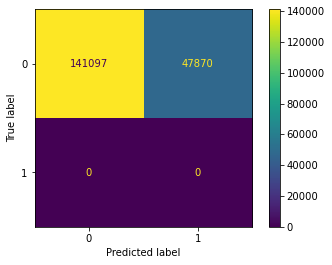

In [270]:
ConfusionMatrixDisplay.from_predictions(y_validate, y_pred_validate)

plt.show()


### Grid search

Grid search over hyperparameter space for best-performing kernel, nu, and gamma parameters

In [237]:
from sklearn.model_selection import GridSearchCV

In [307]:
param_grid = {'kernel':['rbf', 'sigmoid', 'linear'],
              'nu':[0.01, 0.1, 0.15, 0.25, 0.5],
              'gamma':[1, 0.1, 0.01, 0.001, 'scale']}
grid = GridSearchCV(svm.OneClassSVM(), param_grid, refit = True, scoring = 'f1_weighted')

In [288]:
y_train_GS = [-1 if i == 1 else 0 for i in y_train]

In [297]:
y_train_GS.count(0)

10000

In [308]:
grid.fit(X_train, y_train_GS)

GridSearchCV(estimator=OneClassSVM(),
             param_grid={'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
                         'kernel': ['rbf', 'sigmoid', 'linear'],
                         'nu': [0.01, 0.1, 0.15, 0.25, 0.5]},
             scoring='f1_weighted')

In [309]:
print(grid.best_estimator_)

OneClassSVM(gamma=1, nu=0.01)


### Tuned One-class SVM

In [320]:
clf2 = svm.OneClassSVM(kernel = 'rbf', nu = 0.1, gamma = 0.1)
clf2.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.1)

In [321]:
y_pred_validate2 = clf2.predict(X_validate)

In [322]:
y_pred_validate2[y_pred_validate2 == -1].size

106777

In [323]:
y_pred_validate2 = [1 if i == -1 else 0 for i in y_pred_validate2]

#### Validation performance

In [324]:
confusion_matrix(y_validate, y_pred_validate2)

array([[ 82190, 106777],
       [     0,      0]], dtype=int64)

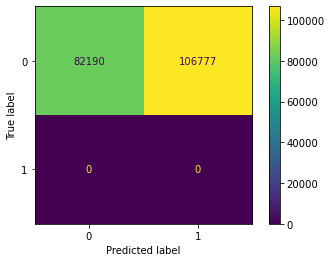

In [325]:
ConfusionMatrixDisplay.from_predictions(y_validate, y_pred_validate2)

plt.show()

#### Test Performance

In [326]:
y_pred_test = clf2.predict(X_test)

In [327]:
y_pred_test[y_pred_test == -1].size

171943

In [328]:
y_pred_test = [1 if i==-1 else 0 for i in y_pred_test]

In [266]:
from sklearn.metrics import classification_report

In [329]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.53      0.68     30535
           1       0.92      1.00      0.95    158432

    accuracy                           0.92    188967
   macro avg       0.94      0.76      0.82    188967
weighted avg       0.92      0.92      0.91    188967



In [330]:
confusion_matrix(y_test, y_pred_test)

array([[ 16261,  14274],
       [   763, 157669]], dtype=int64)

In [268]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

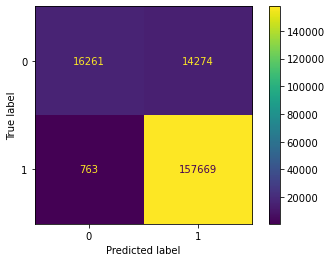

In [331]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

plt.show()


## Isolation Forest

Isolation forest is an unsupervised machine learning method that learns a functional boundary to distinguish normal from anomalious events in a contaminated dataset. Thus, the BETH training and testing datasets will be combined to create a large, contaminated training dataset.

In [198]:
frames = [df_train_eng, df_test_eng]
I_forest_train = pd.concat(frames, ignore_index=True)

In [199]:
I_forest_train.shape

(952111, 18)

In [200]:
I_forest_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952111 entries, 0 to 952110
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   col_0            952111 non-null  int64
 1   col_1            952111 non-null  int64
 2   col_2            952111 non-null  int64
 3   col_3            952111 non-null  int64
 4   col_4            952111 non-null  int64
 5   col_5            952111 non-null  int64
 6   col_6            952111 non-null  int64
 7   col_7            952111 non-null  int64
 8   processId        952111 non-null  int64
 9   threadId         952111 non-null  int64
 10  parentProcessId  952111 non-null  int64
 11  userId           952111 non-null  int64
 12  mountNamespace   952111 non-null  int64
 13  eventId          952111 non-null  int64
 14  argsNum          952111 non-null  int64
 15  returnValue      952111 non-null  int64
 16  sus              952111 non-null  int64
 17  evil             952111 non-n

In [201]:
X = I_forest_train.drop(['sus', 'evil'], axis = 1)

In [202]:
X

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,processId,threadId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue
0,0,1,0,0,0,0,0,1,0,7337,1,1,0,157,5,0
1,0,1,0,0,0,0,0,1,0,7337,1,1,0,3,1,0
2,0,1,0,0,0,0,0,1,0,7337,1,1,0,1010,0,0
3,0,1,0,1,0,0,0,0,0,7347,0,1,1,21,2,-1
4,0,1,0,1,0,0,0,0,0,7347,0,1,1,1005,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952106,1,0,0,0,1,0,0,0,0,7555,0,0,1,42,3,-1
952107,1,0,0,0,1,0,0,0,0,7555,0,0,1,42,3,-1
952108,1,0,0,0,1,0,0,0,0,7555,0,0,1,42,3,-1
952109,1,0,0,0,1,0,0,0,0,7555,0,0,1,42,3,-1


In [203]:
y = I_forest_train["evil"]

In [204]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 952111 entries, 0 to 952110
Series name: evil
Non-Null Count   Dtype
--------------   -----
952111 non-null  int64
dtypes: int64(1)
memory usage: 7.3 MB


In [205]:
from sklearn.model_selection import train_test_split

In [ ]:
X_itrain, X_itest, y_itrain, y_itest = train_test_split(X, y, train_size = 0.8, shuffle=True)

In [257]:
from sklearn.ensemble import IsolationForest

In [270]:
clf2 = IsolationForest(max_samples='auto')
y_pred_train = clf2.fit_predict(I_train)

In [276]:
y_pred_train.size

952111

In [277]:
y_pred_train = [1 if i==-1 else 0 for i in y_pred_train]

In [281]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73    793679
           1       0.05      0.08      0.06    158432

    accuracy                           0.58    952111
   macro avg       0.42      0.38      0.40    952111
weighted avg       0.67      0.58      0.62    952111



### Tune Isolation Forest Parameters

In [282]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Find best-performing contamination parameter

In [295]:
def evaluate_outlier_classifier(model, data):
    #Get labels
    labels = model.fit_predict(data)
    
    #Return inliers
    return data[labels == 1]

In [296]:
def evalaute_regressor(inliers):
    X = inliers.drop(["sus", "evil"], axis = 1)
    y = inliers["evil"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    preds = lr.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared = False)
    
    return round(rmse, 3)

In [285]:
contamination = [0.05, 0.1, 0.15, 0.2, 0.25]
scores = dict()

for c in contamination:
    iforest = IsolationForest(contamination = c, random_state=10)
    
    inliers = evaluate_outlier_classifier(iforest, I_forest_train)
    
    scores[c] = evalaute_regressor(inliers)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [286]:
print(scores)

{0.05: 0.034, 0.1: 0.022, 0.15: 0.0, 0.2: 0.0, 0.25: 0.0}


In [287]:
clf2 = IsolationForest(contamination = 0.15)
y_predict = clf2.fit_predict(I_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [289]:
y_predict = [1 if i==-1 else 0 for i in y_predict]

In [290]:
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83    793679
           1       0.09      0.08      0.08    158432

    accuracy                           0.71    952111
   macro avg       0.45      0.46      0.46    952111
weighted avg       0.70      0.71      0.70    952111



In [330]:
print(dir(y_predict))

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [335]:
y_predict.count(1)

142541

### Tune hyperparameters

In [297]:
from itertools import product

In [298]:
estimators = [100, 200, 300, 500]
max_samples = [0.6, 0.7, 0.8, 1]
scores2 = dict()

In [300]:
for e, m in product(estimators, max_samples):
    iforest = IsolationForest(n_estimators = e, max_samples = m, contamination = 0.15)
    
    inliers = evaluate_outlier_classifier(iforest, I_forest_train)
    
    scores2[(e, m)] = evalaute_regressor(inliers)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have va

In [301]:
scores2

{(100, 0.6): 0.024,
 (100, 0.7): 0.025,
 (100, 0.8): 0.026,
 (100, 1): 0.072,
 (200, 0.6): 0.023,
 (200, 0.7): 0.023,
 (200, 0.8): 0.025,
 (200, 1): 0.072,
 (300, 0.6): 0.025,
 (300, 0.7): 0.026,
 (300, 0.8): 0.025,
 (300, 1): 0.072,
 (500, 0.6): 0.026,
 (500, 0.7): 0.024,
 (500, 0.8): 0.023,
 (500, 1): 0.072}

In [302]:
clf3 = IsolationForest(n_estimators = 200, max_samples = 0.6, contamination = 0.15)
y_predicted = clf3.fit_predict(I_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [303]:
y_predicted = [1 if i==-1 else 0 for i in y_predicted]

In [304]:
print(classification_report(y_train, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82    793679
           1       0.07      0.06      0.06    158432

    accuracy                           0.70    952111
   macro avg       0.44      0.45      0.44    952111
weighted avg       0.69      0.70      0.70    952111

